# Homework 1 Notebook
### Noah Franz
### ASTR 518

## Question 2 Calculations

In [106]:
from astropy import units as u
from astropy import constants as c
import numpy as np

In [105]:
def flux(d, L=3.83e26*u.W):
    return (L / (4*np.pi*d**2)).to(u.erg/(u.s*u.cm**2))

In [109]:
# at the surface of earth (~1 AU)
print(f'f = {flux(1*u.AU):.2e}')

f = 1.36e+06 erg / (s cm2)


In [110]:
# at 10 pc
print(f'f = {flux(10*u.pc):.2e}')

f = 3.20e-07 erg / (s cm2)


## Question 3

In [10]:
# imports

import matplotlib.pyplot as plt
from astroquery.skyview import SkyView
from astropy.wcs import WCS

Using the list of surveys here: https://astroquery.readthedocs.io/en/latest/skyview/skyview.html#getting-started I will query
* `DSS`
* `WISE 22`

To get the same images I found in DS9

In [4]:
fits_imgs = SkyView.get_images(
    position = "NGC 3324",
    survey = ["DSS", "WISE 22"]
)

fits_imgs

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7355d99c9990>],

Now write a function to derive the WCS information from the fits header and plot each image

In [32]:
def plot_skyview_results(fits_img_list, fig, nx_axes=2, ny_axes=1):


    nimg = len(fig.get_axes())+1
    
    img = fits_img_list[0]
    wcs = WCS(img.header)
    
    ax = fig.add_subplot(ny_axes, nx_axes, nimg, projection=wcs)
    ax.imshow(img.data)

    ax.set_ylabel('Declination')
    ax.set_xlabel('Right Ascension')

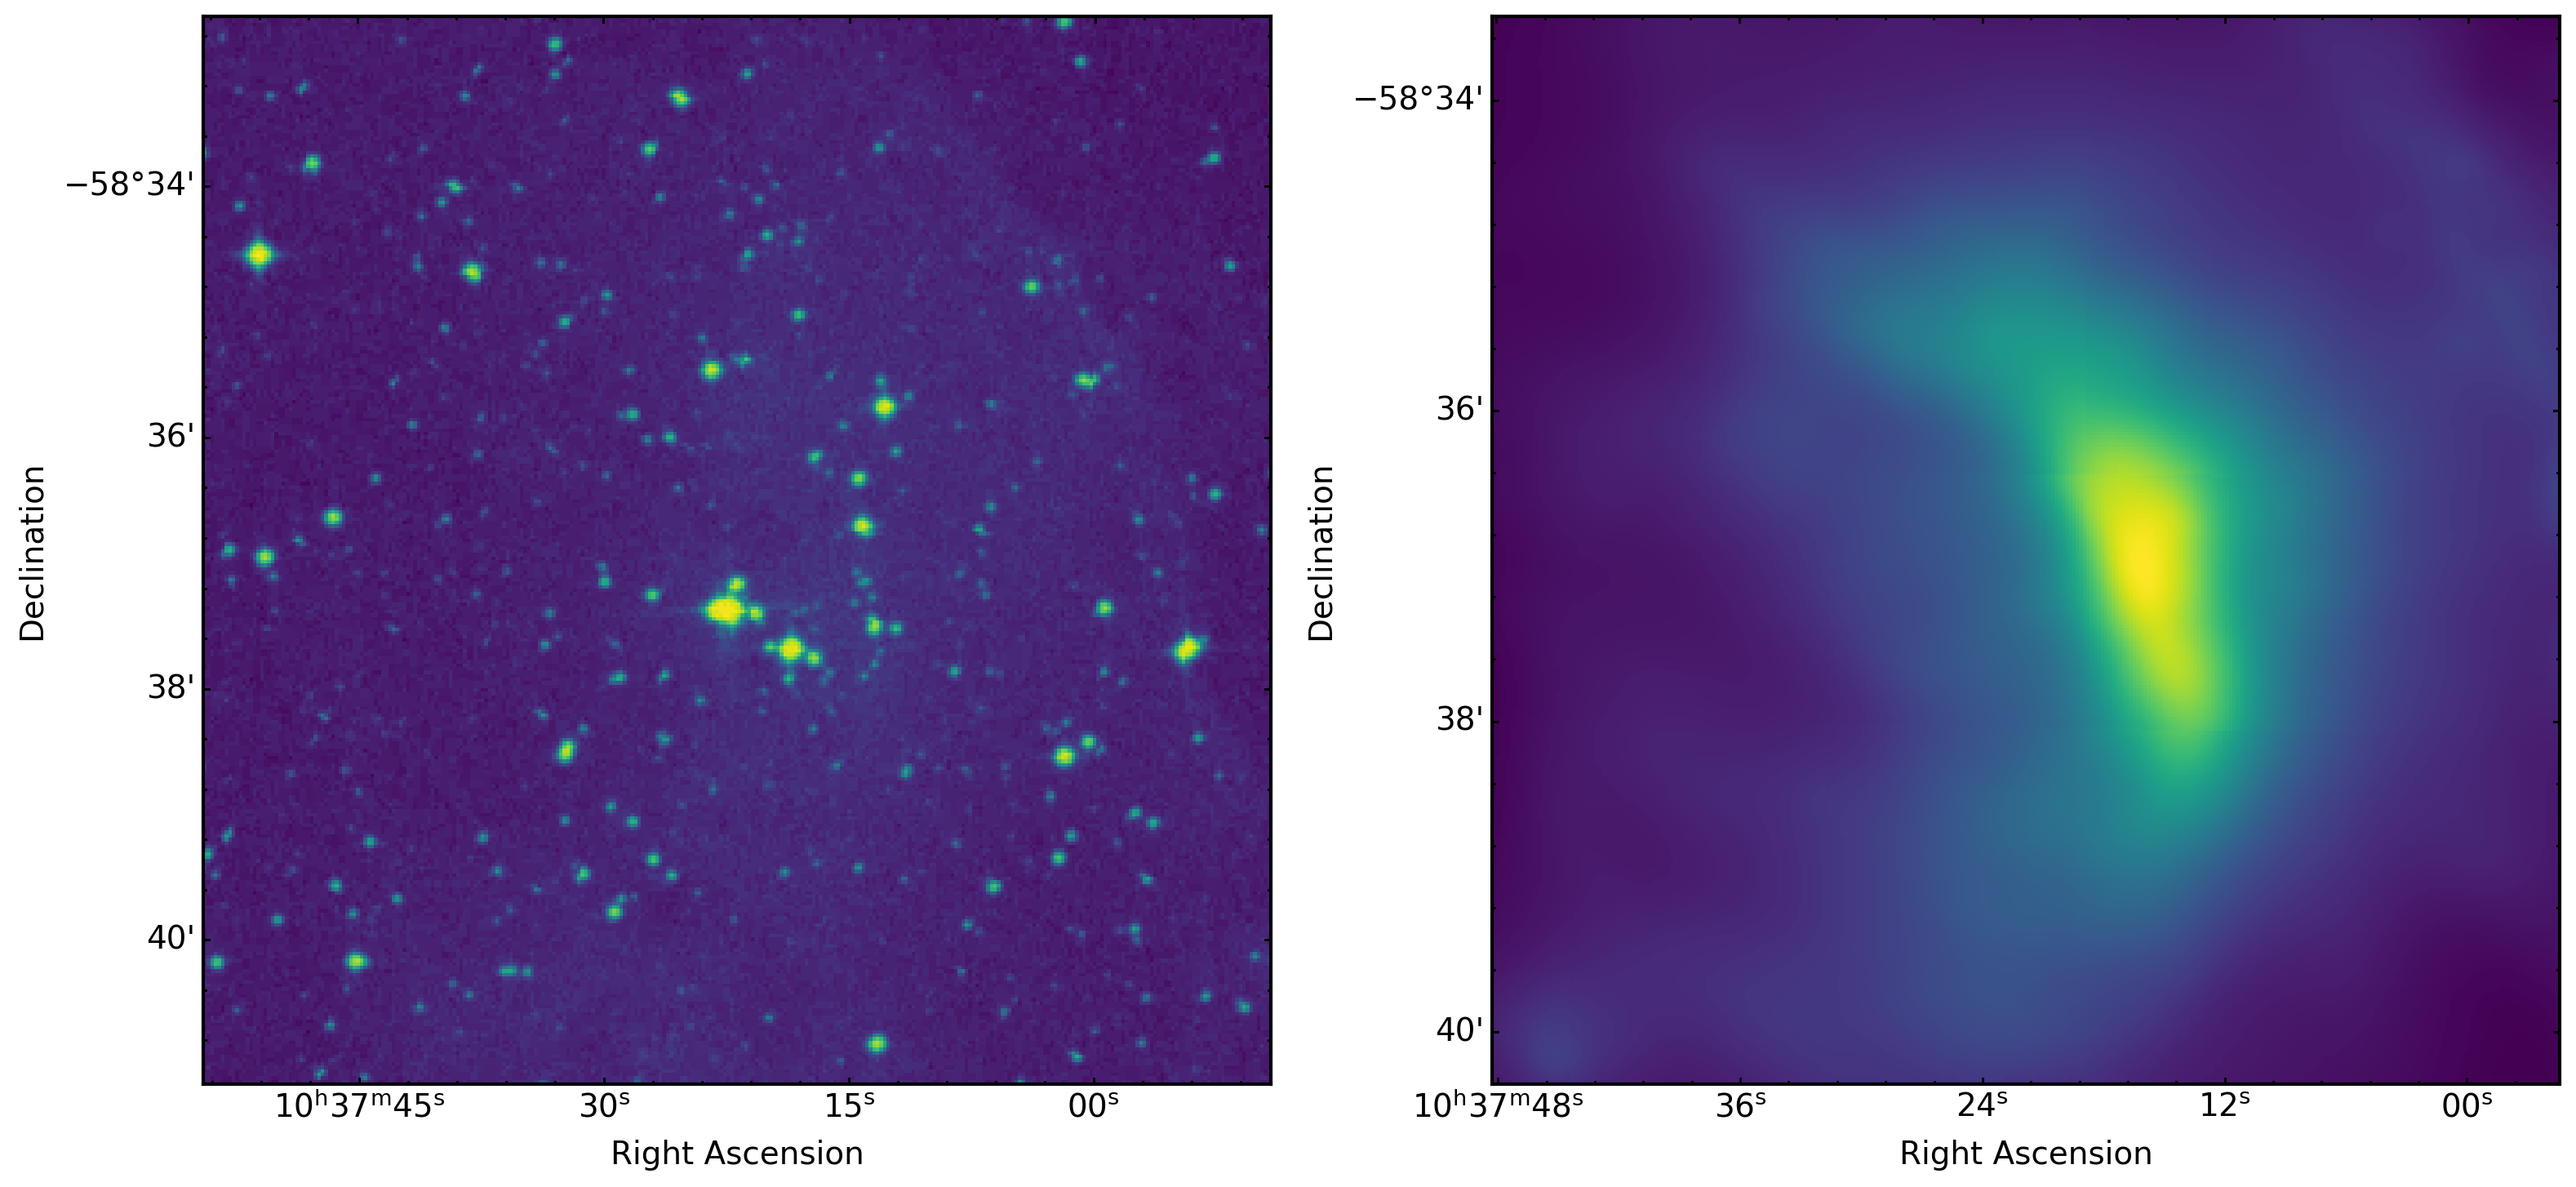

In [111]:
fig = plt.figure(figsize=(16,8))

for img in fits_imgs:
    plot_skyview_results(img, fig=fig)

fig.savefig("python-images.png")

## Question 3c

The JWST image almost look like a stack of these two images where we can see both the dust and the point-like stars. The F444W filter used to take the JWST is an infrared filter with an effective wavelength of $\sim 4.5 \mu m$ (Source: https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-instrumentation/nircam-filters#gsc.tab=0). In contrast, the left image above, taken across multiple DSS filters and stacked, has an effective wavelength of $\sim 600 nm$ (Source: https://irsa.ipac.caltech.edu/applications/FinderChart/docs/coverage.html). This is at much shorter wavelengths than the JWST infrared observation which is why the image mostly catches stars and maybe some hazyness from the dust. Similarly, the right image above, taken with the WISE 22 $\mu$m filter, is much farther infrared than the JWST image. This is why the right image captures basically just dust heated by nearby and/or background starlight in the field. 

Thinking about all of this, it makes sense that each of these surveys would choose different filters and detector resolutions. The DSS image was meant to study the star field in the optical and wanted to "see through" the dust. In contrast, WISE was trying to study the dust and therefore looked at farther infrared filters. Finally, JWST was trying to make a pretty picture and therefore wanted to capture both the incredible dust structures and stars in the field.

## Question 4 Calculations

In [37]:
# we need more astropy stuff here
import numpy as np
from astropy import units as u
from astropy import constants as c

In [100]:
# useful functions
def B_nu(nu, T, eps=1, n=1):
    prefactor = eps * 2 * c.h * nu**3 * n**2 / c.c**2
    power = np.exp(c.h*nu/(c.k_B*T)) - 1
    return prefactor/power * u.sr**-1

def B_lambda(wv, T):
    return 2*c.h*c.c**2 / wv**5 * (np.exp(c.h*c.c / (wv*c.k_B*T)) - 1)**-1 * u.sr**-1

def F(area, b, r):
    return area*b / (4*r**2) * u.sr

# given values
d_p = 0.5*u.mm
wv_filt = 3.5*u.um
d_src = 1*u.mm
D_src = 100*u.m
T_src = 1500*u.K
eps = 0.6 # transmission fraction

# some other useful, but calculated, values
nu_filt = (c.c/wv_filt).to(u.Hz)
print(f'nu_filt = {nu_filt:.2e}')

A_src = np.pi * (d_src/2)**2
print(f'A_src = {A_src:.2f}')

A_det = np.pi * (d_p/2)**2
print(f'A_det = {A_det:.2f}')

b_wv = wv_filt * 0.05
print(f'b_wv = {b_wv:.2f}')
b_nu = nu_filt * 0.05 #(c.c / b_wv).to(u.Hz)
print(f'b_nu = {b_nu:.2e}')

nu_filt = 8.57e+13 Hz
A_src = 0.79 mm2
A_det = 0.20 mm2
b_wv = 0.18 um
b_nu = 4.28e+12 Hz


In [83]:
bnu = B_nu(nu_filt, T_src).to(u.erg / (u.Hz * u.s * u.cm**2 * u.sr))
bnu

<Quantity 6.39263245e-07 erg / (sr cm2)>

In [84]:
bwv = B_lambda(wv_filt, T_src).to(u.erg / (u.s * u.AA * u.cm**2 * u.sr))
bwv

<Quantity 1564.45958897 erg / (Angstrom s sr cm2)>

In [91]:
Fnu = F(A_src, bnu, D_src).to(u.erg / (u.cm**2 * u.Hz * u.s))
Fnu

<Quantity 1.25519045e-17 erg / (Hz s cm2)>

In [93]:
Fwv = F(A_src, bwv, D_src).to(u.erg / (u.cm**2 * u.AA * u.s))
Fwv

<Quantity 3.07180922e-08 erg / (Angstrom s cm2)>

In [102]:
P_wv = Fwv * b_wv * A_det * eps
P_wv.to(u.erg/u.s)

<Quantity 6.33305746e-08 erg / s>

In [103]:
P_nu = Fnu * b_nu * A_det * eps
P_nu.to(u.erg/u.s)

<Quantity 6.33305746e-08 erg / s>